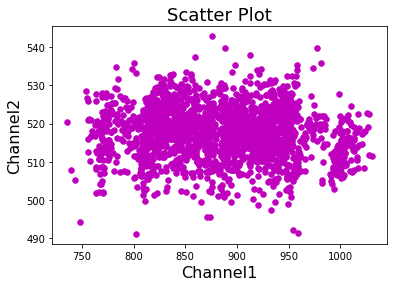

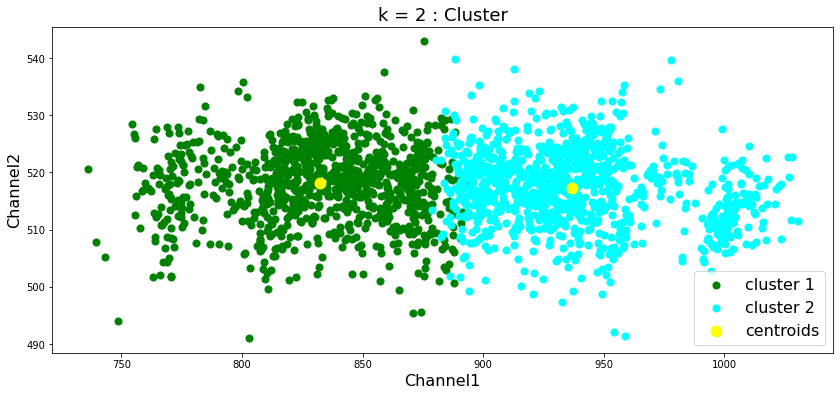

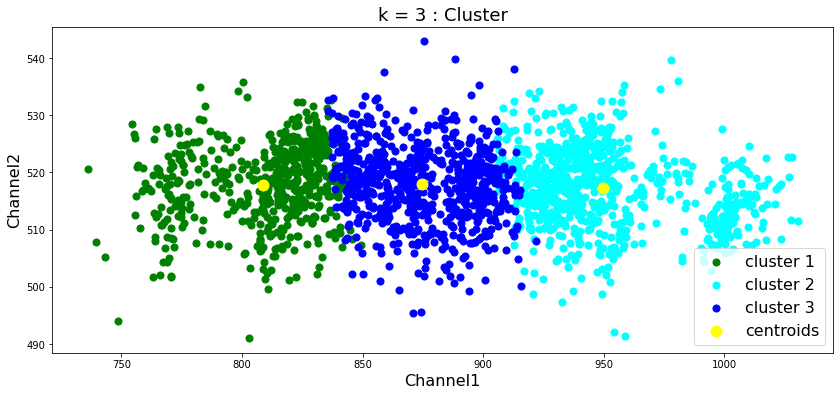

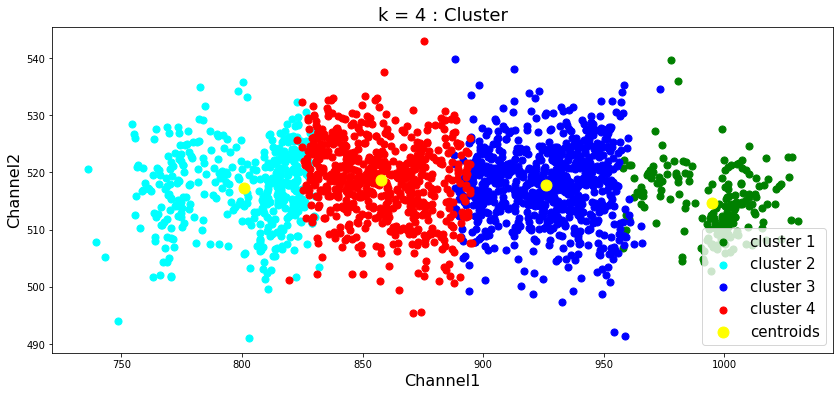

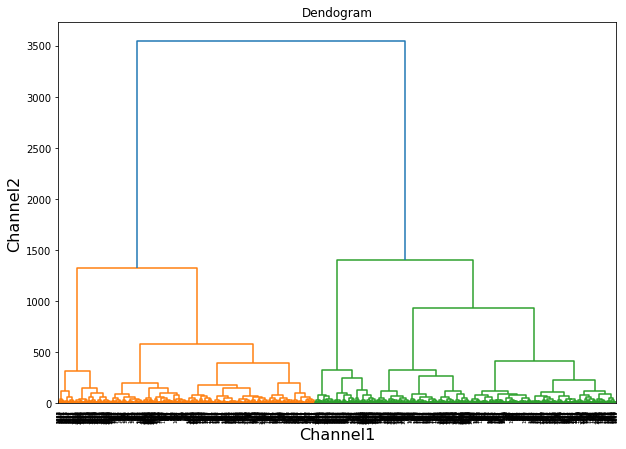

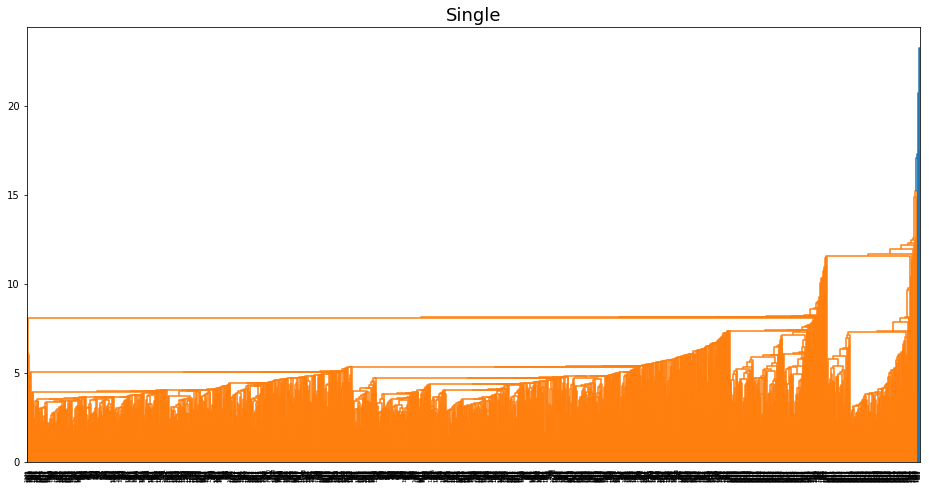

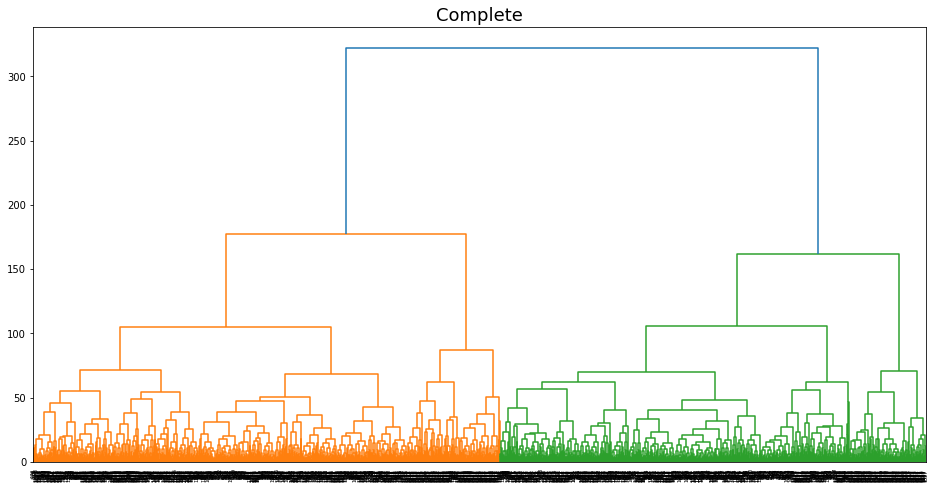

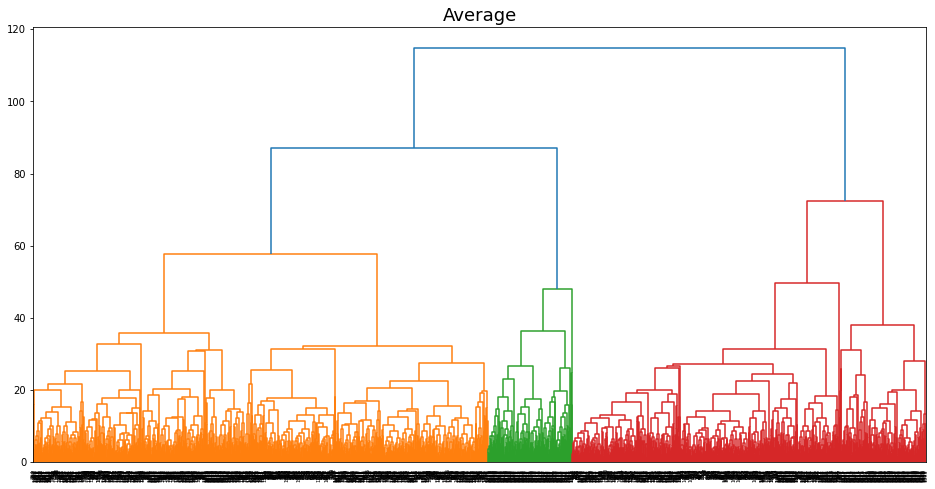

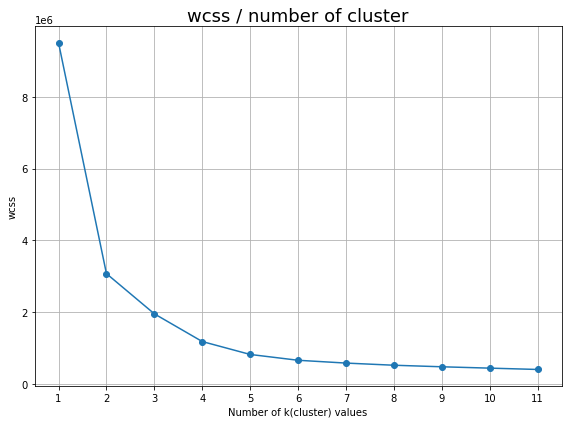

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("/content/Book1.csv")
df.dropna()


df = df.drop(['IndexId','Ref1','Ref2','Ref3'],axis=1)

df = df.iloc[:, :].values

# Scatter plot
plt.scatter(df[: ,0], df[: ,1] , color = "m", marker = "o", s = 30)
plt.title("Scatter Plot",fontsize=18)
plt.xlabel("Channel1",fontsize=16)
plt.ylabel("Channel2",fontsize=16)
plt.show()
print()

# Cluster = 2
kmeans2 = KMeans(n_clusters=2)
y_km2 = kmeans2.fit_predict(df)

plt.figure(figsize=(14,6))
plt.scatter(df[y_km2 == 0, 0],df[y_km2 == 0, 1],s = 50,c="green",label = "cluster 1")
plt.scatter(df[y_km2 == 1, 0],df[y_km2 == 1, 1],s = 50,c="cyan",label = "cluster 2")

plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s = 120,marker = 'o',color="yellow", label = "centroids")
plt.title("k = 2 : Cluster",fontsize=18)
plt.xlabel("Channel1",fontsize=16)
plt.ylabel("Channel2",fontsize=16)
plt.legend(loc='lower right',fontsize=16)
plt.show()
print()

# Cluster = 3
kmeans3 = KMeans(n_clusters=3)
y_km3 = kmeans3.fit_predict(df)

plt.figure(figsize=(14,6))
plt.scatter(df[y_km3 == 0, 0],df[y_km3 == 0, 1],s = 50,c="green",label = "cluster 1")
plt.scatter(df[y_km3 == 1, 0],df[y_km3 == 1, 1],s = 50,c="cyan",label = "cluster 2")
plt.scatter(df[y_km3 == 2, 0],df[y_km3 == 2, 1],s = 50,c="blue",label = "cluster 3")

plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],s = 120,marker = 'o',color="yellow", label = "centroids")
plt.title("k = 3 : Cluster",fontsize=18)
plt.xlabel("Channel1",fontsize=16)
plt.ylabel("Channel2",fontsize=16)
plt.legend(loc='lower right',fontsize=16)
plt.show()
print()

# Cluster = 4
kmeans4 = KMeans(n_clusters=4)
y_km4 = kmeans4.fit_predict(df)

plt.figure(figsize=(14,6))
plt.scatter(df[y_km4 == 0, 0],df[y_km4 == 0, 1],s = 50,c="green",label = "cluster 1")
plt.scatter(df[y_km4 == 1, 0],df[y_km4 == 1, 1],s = 50,c="cyan",label = "cluster 2")
plt.scatter(df[y_km4 == 2, 0],df[y_km4 == 2, 1],s = 50,c="blue",label = "cluster 3")
plt.scatter(df[y_km4 == 3, 0],df[y_km4 == 3, 1],s = 50,c="red",label = "cluster 4")

plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],s = 120,marker = 'o',color="yellow", label = "centroids")
plt.title("k = 4 : Cluster",fontsize=18)
plt.xlabel("Channel1",fontsize=16)
plt.ylabel("Channel2",fontsize=16)
plt.legend(loc='lower right',fontsize=15)
plt.show()
print()



# HIERARCHICAL CLUSTERING - DADNDOGRAM
plt.figure(figsize=(10, 7))
merg=linkage(df,method="ward")      
dendrogram(merg,leaf_rotation=90)
plt.title("Dendogram")
plt.xlabel("Channel1",fontsize=16)
plt.ylabel("Channel2",fontsize=16)
plt.show()
print()

# Single
plt.figure(figsize=(16, 8))
plt.title("Single",fontsize=18)
dendrogram(linkage(df, 'single'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
print()

# Complete
plt.figure(figsize=(16, 8))
plt.title("Complete",fontsize=18)
dendrogram(linkage(df, 'complete'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
print()

# Average
plt.figure(figsize=(16, 8))
plt.title("Average",fontsize=18)
dendrogram(linkage(df, 'average'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()
print()

# Elbow method curve
wcss=[]

for k in range(1,12):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# Elbow rule on plot    
plt.figure(figsize=(8,6))
plt.plot(range(1,12),wcss,"-o")
plt.title("wcss / number of cluster", fontsize=18)
plt.xlabel("Number of k(cluster) values")
plt.xticks(range(1,12))
plt.grid(True)
plt.ylabel("wcss")
plt.tight_layout()
plt.show()